In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import matplotlib
from collections import Counter
from sklearn import ensemble
from sklearn import linear_model
from sklearn.grid_search import GridSearchCV
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
import sklearn.metrics as metrics
import math
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
listings = pd.read_csv('listings_clean_v3.csv')
listings.head()

,price,id,host_id,host_since,host_response_rate,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,...,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,110,18461891,916092,6.169863,0,f,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,...,6,0,93.489996,9.569788,9.238499,9.727144,9.748861,9.447569,9.381348,0.00
1,125,6627449,13886510,3.498630,100%,f,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,...,3,21,95.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.77
2,100,19949243,1149260,6.060274,100%,f,1.0,"['email', 'phone', 'facebook']",t,f,...,3,0,93.489996,9.569788,9.238499,9.727144,9.748861,9.447569,9.381348,0.00
3,300,1886820,9815788,3.912329,0,f,1.0,"['email', 'phone']",t,f,...,7,0,93.489996,9.569788,9.238499,9.727144,9.748861,9.447569,9.381348,0.00
4,69,5557381,28811542,2.580822,100%,t,1.0,"['email', 'phone', 'reviews', 'jumio']",t,t,...,3,94,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,3.27


In [3]:
listings['host_response_rate']=listings['host_response_rate'].map(lambda p: float(p.replace('%',''))/100)

In [4]:
listings.head()

,price,id,host_id,host_since,host_response_rate,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,...,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,110,18461891,916092,6.169863,0.0,f,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,...,6,0,93.489996,9.569788,9.238499,9.727144,9.748861,9.447569,9.381348,0.00
1,125,6627449,13886510,3.498630,1.0,f,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,...,3,21,95.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.77
2,100,19949243,1149260,6.060274,1.0,f,1.0,"['email', 'phone', 'facebook']",t,f,...,3,0,93.489996,9.569788,9.238499,9.727144,9.748861,9.447569,9.381348,0.00
3,300,1886820,9815788,3.912329,0.0,f,1.0,"['email', 'phone']",t,f,...,7,0,93.489996,9.569788,9.238499,9.727144,9.748861,9.447569,9.381348,0.00
4,69,5557381,28811542,2.580822,1.0,t,1.0,"['email', 'phone', 'reviews', 'jumio']",t,t,...,3,94,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,3.27


{'boxes': [<matplotlib.lines.Line2D at 0x1a114dfa58>],
 'caps': [<matplotlib.lines.Line2D at 0x1a114f2588>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a11666278>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a114f2dd8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a114dfbe0>,
  <matplotlib.lines.Line2D at 0x1a114f2160>]}

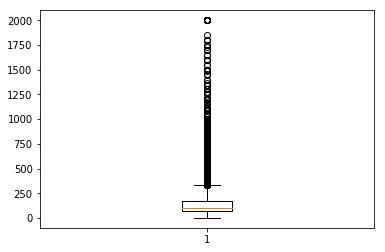

In [5]:
plt.boxplot(listings['price'])
plt.show()

In [6]:
listings=listings[listings['price']<=600]

In [7]:
listings.groupby(['beds']).size()

beds
0.0         2
1.0     28732
2.0      8859
3.0      2985
4.0      1198
5.0       443
6.0       207
7.0        72
8.0        44
9.0        13
10.0       18
11.0        4
12.0        8
13.0        4
15.0        1
16.0        5
18.0        1
dtype: int64

In [8]:
listings=listings[listings['beds']<=10]

In [9]:
listings.shape

(42573, 31)

In [10]:
listings['price'].describe()

count    42573.000000
mean       132.662674
std         92.035348
min          1.000000
25%         69.000000
50%        100.000000
75%        170.000000
max        600.000000
Name: price, dtype: float64

In [11]:
listings['price_log']=listings['price'].map(lambda p: math.log(p))

<Figure size 648x432 with 0 Axes>

(array([  2090.,  13043.,   9550.,   6656.,   4933.,   1504.,   1787.,
          1007.,    630.,    514.,    122.,    226.,    281.,     82.,
           148.]),
 array([   1.        ,   40.93333333,   80.86666667,  120.8       ,
         160.73333333,  200.66666667,  240.6       ,  280.53333333,
         320.46666667,  360.4       ,  400.33333333,  440.26666667,
         480.2       ,  520.13333333,  560.06666667,  600.        ]),
 <a list of 15 Patch objects>)

Text(0.5,1,'Histogram of price')

Text(0.5,0,'price')

Text(0,0.5,'Frequency')

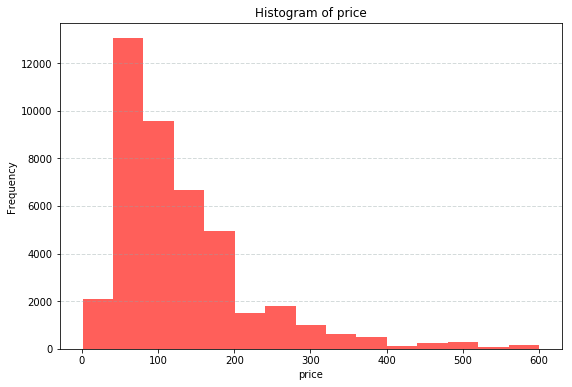

In [13]:
plt.figure(figsize=(9,6))
#plt.subplot(1,1,1,axisbg=(1,1,1))
plt.hist(listings['price'], bins=15,color='#FF5F5A')
plt.title("Histogram of price")
plt.xlabel("price")
plt.ylabel("Frequency")
plt.grid(color='#95a5a6',linestyle='--', linewidth=1,axis='y',alpha=0.4)
plt.show()


clearly skewed with a long tail  
log to normalize 

<Figure size 648x432 with 0 Axes>

(array([  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   1.50000000e+01,
          2.00000000e+01,   4.40000000e+02,   2.85500000e+03,
          8.49600000e+03,   1.01100000e+04,   9.76000000e+03,
          7.24500000e+03,   2.45000000e+03,   1.18000000e+03]),
 array([ 0.        ,  0.42646198,  0.85292395,  1.27938593,  1.70584791,
         2.13230989,  2.55877186,  2.98523384,  3.41169582,  3.83815779,
         4.26461977,  4.69108175,  5.11754372,  5.5440057 ,  5.97046768,
         6.39692966]),
 <a list of 15 Patch objects>)

Text(0.5,1,'Histogram of pricing log-transformation')

Text(0.5,0,'price')

Text(0,0.5,'Frequency')

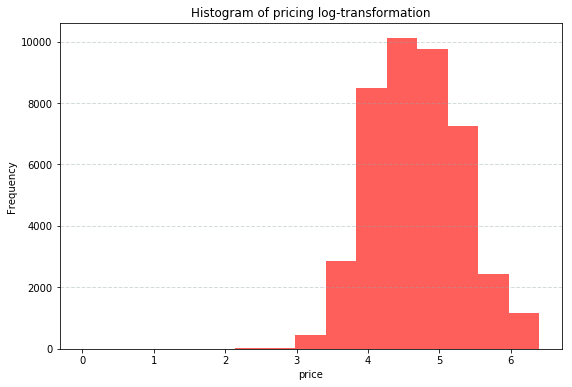

In [15]:
plt.figure(figsize=(9,6))
#plt.subplot(1,1,1,axisbg=(1,1,1))
plt.hist(listings['price_log'], bins=15,color='#FF5F5A')
plt.title("Histogram of pricing log-transformation")
plt.xlabel("price")
plt.ylabel("Frequency")
plt.grid(color='#95a5a6',linestyle='--', linewidth=1,axis='y',alpha=0.4)
plt.savefig("logdistribution.jpg")
plt.show()

# Quantile-Quantile plot
The quantile-quantile or q-q plot is an exploratory graphical device used to check the validity of a distributional assumption for a data set. 

((array([-4.15476296, -3.94729232, -3.83411387, ...,  3.83411387,
          3.94729232,  4.15476296]),
  array([  1,   5,  10, ..., 600, 600, 600])),
 (83.754152869671884, 132.66267352547388, 0.90994494586374763))

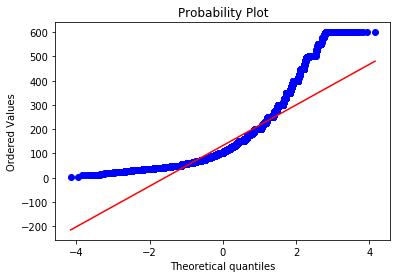

In [16]:
import scipy.stats as stats
import pylab
stats.probplot(listings['price'],dist="norm",plot=pylab)
pylab.show()


((array([-4.15476296, -3.94729232, -3.83411387, ...,  3.83411387,
          3.94729232,  4.15476296]),
  array([ 0.        ,  1.60943791,  2.30258509, ...,  6.39692966,
          6.39692966,  6.39692966])),
 (0.62011713345710184, 4.6893247963200748, 0.99646488576693348))

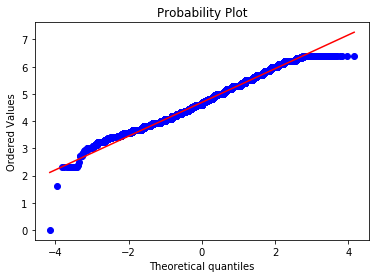

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/scipy/stats/morestats.py:1310: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


2.8827259774366558e-39

In [17]:
stats.probplot(listings['price_log'],dist="norm",plot=pylab)
pylab.show()
stats.shapiro(listings['price_log'])[1]

In [18]:
listings.columns

Index(['price', 'id', 'host_id', 'host_since', 'host_response_rate',
       'host_is_superhost', 'host_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'zipcode',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'minimum_nights', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month', 'price_log'],
      dtype='object')

In [19]:
df=listings[[ 'price', 'host_since', 'host_response_rate',
        'host_listings_count', 
        'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'minimum_nights',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month', 'price_log']]

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

<Figure size 504x360 with 0 Axes>

<BarContainer object of 4 artists>

Text(0,38.1433,'38.09')

Text(1,38.2287,'38.18')

Text(2,38.2291,'38.18')

Text(3,40.3397,'40.29')

([<matplotlib.axis.XTick at 0x1a23dade10>,
 <a list of 4 Text xticklabel objects>)

Text(0.5,0,'Estimator')

Text(0,0.5,'Median Absolute Error')

Text(0.5,1,'Median Absolute Error')

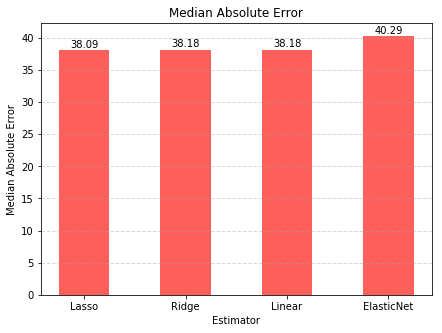

In [23]:

rs = 1
ests = [ linear_model.LinearRegression(), linear_model.Ridge(),
        linear_model.Lasso(), 
         linear_model.ElasticNet()]
ests_labels = np.array(['Linear', 'Ridge', 'Lasso',  'ElasticNet'])
errvals = np.array([])

X_train, X_test, y_train, y_test = train_test_split(df.drop(['price','price_log'], axis=1),
                                                    df.price, test_size=0.2, random_state=15)

for e in ests:
    e.fit(X_train, y_train)
    this_err = metrics.median_absolute_error(y_test, e.predict(X_test))
    #print "got error %0.2f" % this_err
    errvals = np.append(errvals, this_err)

pos = np.arange(errvals.shape[0])
srt = np.argsort(errvals)
plt.figure(figsize=(7,5))
#plt.subplot(1,1,1,axisbg=(1,1,1))
plt.bar(pos, errvals[srt],width=0.5, align='center',color='#FF5F5A')
#plt.ylim(30,45)
for x,y in zip(pos, errvals[srt]):
    plt.text(x, y+0.05, '%.2f' % y, ha='center', va= 'bottom')
plt.xticks(pos, ests_labels[srt])
plt.xlabel('Estimator')
plt.ylabel('Median Absolute Error')
plt.title('Median Absolute Error')
plt.grid(color='#95a5a6',linestyle='--', linewidth=1,axis='y',alpha=0.4)
plt.show()

In [24]:
y = df.price
x = df.drop(['price','price_log'],axis=1)

In [25]:
def median_absolute_errors(x, y, log_bool=None):
    reg_params = 10.**np.linspace(-10, 5, 10)
    models = [ linear_model.LinearRegression(),
              linear_model.Ridge(),  
              linear_model.Lasso(),  linear_model.ElasticNet()]
    model_labels = np.array(['Linear','Ridge', 'Lasso', 'ElasticNet'])
    model_errors = np.array([])

    X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=20)

    for model in models:
        model.fit(X_train, y_train)
        if not log_bool:
            model_err = metrics.median_absolute_error((y_test), model.predict(X_test))
            model_errors = np.append(model_errors, model_err)
        else:
            model_err = metrics.median_absolute_error(np.exp(y_test), np.exp(model.predict(X_test)))
            model_errors = np.append(model_errors, model_err)
    
    model_position = np.arange(model_errors.shape[0])
    models_sorted = np.argsort(model_errors)
    
    for i, model in enumerate(model_labels):
        print ('Model {} Results: {}'.format(model_labels[i], model_errors[i]))

    plt.figure(figsize=(7,5))
    #plt.subplot(1,1,1,axisbg=(1,1,1))
    plt.bar(model_position, model_errors[models_sorted], align='center',color='#FF5F5A')
    for x,y in zip(model_position,  model_errors[models_sorted]):
        plt.text(x, y+0.05, '%.2f' % y, ha='center', va= 'bottom')
    plt.xticks(model_position, model_labels[models_sorted])
    plt.xlabel('Estimator')
    plt.title('Median Absolute Error')
    plt.ylabel('Median Absolute Error')
    plt.grid(color='#95a5a6',linestyle='--', linewidth=1,axis='y',alpha=0.4)
    plt.show()

Model Linear Results: 38.27933126924171
Model Ridge Results: 38.28219395850567
Model Lasso Results: 38.12729984673081
Model ElasticNet Results: 40.546374260554444


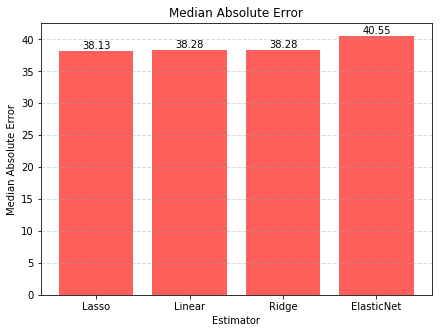

In [26]:
median_absolute_errors(x, y)

# one hot encoding

In [27]:
df_dumpre=listings[['host_since', 'host_response_rate',
       'host_is_superhost', 'host_listings_count', 
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_group_cleansed',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type',  'price', 'minimum_nights',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month', 'price_log']]
df_dum=pd.get_dummies(df_dumpre)

df_dum.columns

Index(['host_since', 'host_response_rate', 'host_listings_count',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'reviews_per_month',
       'price_log', 'host_is_superhost_f', 'host_is_superhost_t',
       'host_has_profile_pic_f', 'host_has_profile_pic_t',
       'host_identity_verified_f', 'host_identity_verified_t',
       'neighbourhood_group_cleansed_Bronx',
       'neighbourhood_group_cleansed_Brooklyn',
       'neighbourhood_group_cleansed_Manhattan',
       'neighbourhood_group_cleansed_Queens',
       'neighbourhood_group_cleansed_Staten Island', 'property_type_Apartment',
       'property_type_Bed & Breakfast', 'property_type_Boat',
       'property_type_Boutique hotel', 'property_type_Bungalow',
       'proper

In [28]:
pd.set_option('large_repr', 'truncate')
df2=df_dum.drop(['host_is_superhost_f', 'host_has_profile_pic_f','host_identity_verified_f'],axis=1)
df2.head()

,host_since,host_response_rate,host_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,number_of_reviews,...,property_type_Villa,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
0,6.169863,0.0,1.0,2,1.0,0.0,1.0,110,6,0,...,0,0,1,0,0,0,0,0,0,1
1,3.498630,1.0,1.0,3,1.0,1.0,1.0,125,3,21,...,0,0,1,0,0,0,0,0,0,1
2,6.060274,1.0,1.0,4,1.0,1.0,3.0,100,3,0,...,0,0,1,0,0,0,0,0,0,1
3,3.912329,0.0,1.0,4,3.0,3.0,3.0,300,7,0,...,0,0,1,0,0,0,0,0,0,1
4,2.580822,1.0,1.0,4,1.0,1.0,1.0,69,3,94,...,0,0,0,1,0,0,0,0,0,1


In [29]:
df2.isnull().any().any()

False

$MedAE(y,\widehat{y})=median(|y_1-\widehat{y_1}|,...,|y_n-\widehat{y_n}|)$  


$\frac{1}{2}{\parallel y-X\beta \parallel}^{2}_{2}+\lambda{\parallel\beta\parallel}_{1}$

In [32]:
def median_absolute_errors2(x, y, log_bool=None):
    reg_params = 10.**np.linspace(-10, 5, 10)
    models = [ linear_model.LinearRegression(),linear_model.BayesianRidge(),  linear_model.Lasso(),  linear_model.ElasticNet()]
    model_labels = np.array(['Linear','Ridge', 'Lasso', 'ElasticNet'])
    model_errors = np.array([])

    X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=20)

    for model in models:
        model.fit(X_train, y_train)
        if not log_bool:
            model_err = metrics.median_absolute_error((y_test), model.predict(X_test))
            model_errors = np.append(model_errors, model_err)
        else:
            model_err = metrics.median_absolute_error(np.exp(y_test), np.exp(model.predict(X_test)))
            model_errors = np.append(model_errors, model_err)
    
    model_position = np.arange(model_errors.shape[0])
    models_sorted = np.argsort(model_errors)
    for i, model in enumerate(model_labels):
        print ('Model {} Results: {}'.format(model_labels[i], model_errors[i]))

    plt.figure(figsize=(7,5))
    #plt.subplot(1,1,1,axisbg=(1,1,1))
    plt.bar(model_position, model_errors[models_sorted], align='center',color='#FF5F5A')
    for x,y in zip(model_position,  model_errors[models_sorted]):
        plt.text(x, y+0.05, '%.2f' % y, ha='center', va= 'bottom')
    plt.xticks(model_position, model_labels[models_sorted])
    plt.xlabel('Estimator')
    plt.ylabel('Median Absolute Error')
    plt.ylim(0,40)
    plt.title('Median Absolute Error')
    plt.grid(color='#95a5a6',linestyle='--', linewidth=1,axis='y',alpha=0.4)
    plt.show()

Model Linear Results: 28.616899022960382
Model Ridge Results: 28.603138217467233
Model Lasso Results: 28.355844415329642
Model ElasticNet Results: 32.95020542663838


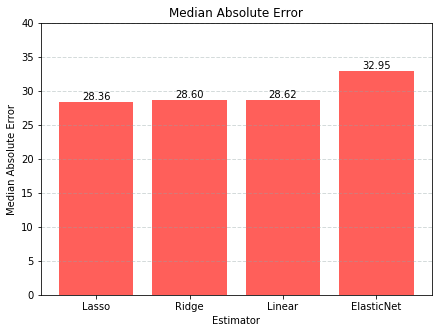

In [33]:
median_absolute_errors2(df2.drop(['price','price_log'],axis=1), df2.price)

In [39]:
def median_absolute_errors3(x, y, log_bool=None):
    reg_params = 10.**np.linspace(-10, 5, 10)
    models = [ linear_model.LinearRegression(),linear_model.Ridge(),  linear_model.Lasso(),  linear_model.ElasticNet(),
             RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=-1, oob_score=True, random_state=3,
           verbose=0, warm_start=False)]
    model_labels = np.array(['Linear','Ridge', 'Lasso', 'ElasticNet','Random Forest'])
    model_errors = np.array([])

    X_train, X_test, y_train, y_test = train_test_split(df2.drop(['price','price_log'], axis=1),
                                                    df2.price, test_size=0.20, random_state=20)

    for model in models:
        model.fit(X_train, y_train)
        if not log_bool:
            model_err = metrics.median_absolute_error((y_test), model.predict(X_test))
            model_errors = np.append(model_errors, model_err)
        else:
            model_err = metrics.median_absolute_error(np.exp(y_test), np.exp(model.predict(X_test)))
            model_errors = np.append(model_errors, model_err)
    
    model_position = np.arange(model_errors.shape[0])
    models_sorted = np.argsort(model_errors)
    for i, model in enumerate(model_labels):
        print ('Model {} Results: {}'.format(model_labels[i], model_errors[i]))

    plt.figure(figsize=(7,5))
    #plt.subplot(1,1,1,axisbg=(1,1,1))
    plt.bar(model_position, model_errors[models_sorted], align='center',color='#FF5F5A')
    for x,y in zip(model_position,  model_errors[models_sorted]):
        plt.text(x, y+0.05, '%.2f' % y, ha='center', va= 'bottom')
    plt.xticks(model_position, model_labels[models_sorted])
    plt.xlabel('Estimator')
    plt.ylabel('Median Absolute Error')
    plt.grid(color='#95a5a6',linestyle='--', linewidth=1,axis='y',alpha=0.4)
    plt.show()

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  Depr

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  Depr

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  Depr

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  Depr

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  Depr

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  Depr

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  Depr

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  Depr

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  Depr

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  Depr

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  Depr

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  Depr

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  Depr

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  Depr

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  Depr

Model Linear Results: 28.616899022960382
Model Ridge Results: 28.62176729835511
Model Lasso Results: 28.355844415329642
Model ElasticNet Results: 32.95020542663838
Model Random Forest Results: 24.32268517254508


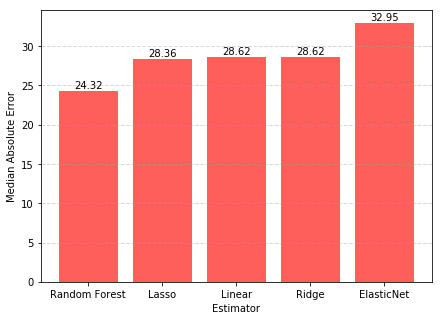

In [40]:
median_absolute_errors3(df2.drop(['price','price_log'],axis=1), df2.price)

In [41]:
def median_absolute_errors3(x, y, log_bool=None):
    reg_params = 10.**np.linspace(-10, 5, 10)
    models = [ linear_model.LinearRegression(),linear_model.Ridge(),  linear_model.Lasso(),  linear_model.ElasticNet(),
             RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=-1, oob_score=True, random_state=3,
           verbose=0, warm_start=False),xgb.XGBRegressor()]
    model_labels = np.array(['Linear','Ridge', 'Lasso', 'ElasticNet','Random Forest','Xgboost'])
    model_errors = np.array([])

    X_train, X_test, y_train, y_test = train_test_split(df2.drop(['price','price_log'], axis=1),
                                                    df2.price, test_size=0.20, random_state=20)

    for model in models:
        model.fit(X_train, y_train)
        if not log_bool:
            model_err = metrics.median_absolute_error((y_test), model.predict(X_test))
            model_errors = np.append(model_errors, model_err)
        else:
            model_err = metrics.median_absolute_error(np.exp(y_test), np.exp(model.predict(X_test)))
            model_errors = np.append(model_errors, model_err)
    
    model_position = np.arange(model_errors.shape[0])
    models_sorted = np.argsort(model_errors)
    for i, model in enumerate(model_labels):
        print ('Model {} Results: {}'.format(model_labels[i], model_errors[i]))

    plt.figure(figsize=(7,5))
    #plt.subplot(1,1,1,axisbg=(1,1,1))
    plt.bar(model_position, model_errors[models_sorted], align='center',color='#FF5F5A')
    for x,y in zip(model_position,  model_errors[models_sorted]):
        plt.text(x, y+0.05, '%.2f' % y, ha='center', va= 'bottom')
    plt.xticks(model_position, model_labels[models_sorted])
    plt.xlabel('Estimator')
    plt.ylabel('Median Absolute Error')
    plt.grid(color='#95a5a6',linestyle='--', linewidth=1,axis='y',alpha=0.4)
    plt.show()

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  Depr

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  Depr

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  Depr

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  Depr

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  Depr

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  Depr

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  Depr

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  Depr

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  Depr

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  Depr

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  Depr

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  Depr

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  Depr

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  Depr

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  Depr

Model Linear Results: 28.61689902296041
Model Ridge Results: 28.62176729835511
Model Lasso Results: 28.355844415329642
Model ElasticNet Results: 32.95020542663838
Model Random Forest Results: 24.322685172545093
Model Xgboost Results: 24.6920166015625


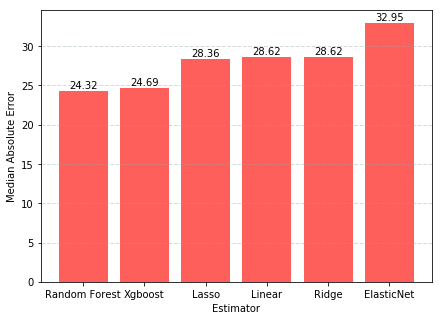

In [42]:
median_absolute_errors3(x, y)

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  Depr

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  Depr

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  Depr

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  Depr

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  Depr

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  Depr

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  Depr

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  Depr

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  Depr

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  Depr

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  Depr

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  Depr

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  Depr

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  Depr

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  Depr

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=True, random_state=3, verbose=0, warm_start=False)

<Figure size 576x1440 with 0 Axes>

<BarContainer object of 61 artists>

([<matplotlib.axis.YTick at 0x1a15ac1160>,
 <a list of 61 Text yticklabel objects>)

Text(0.5,0,'Relative Importance')

Text(0.5,1,'Feature Importance')

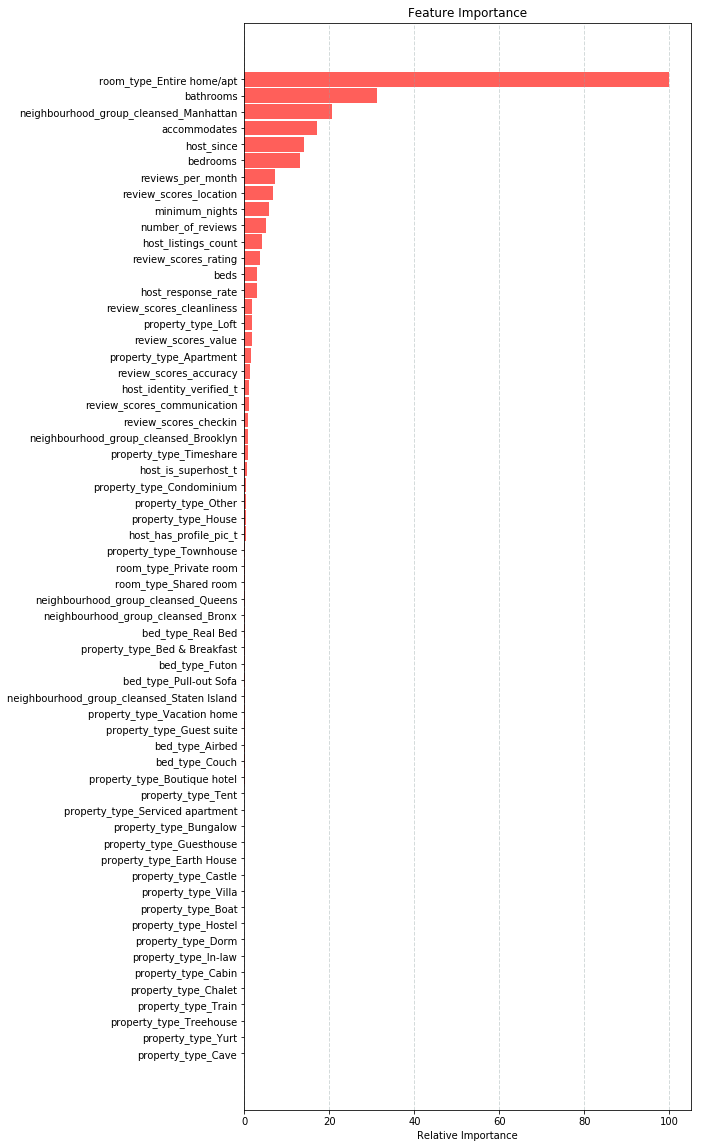

In [43]:
clf=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=-1, oob_score=True, random_state=3,
           verbose=0, warm_start=False)
clf.fit(X_train, y_train)
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
pvals = feature_importance[sorted_idx]
pcols = X_train.columns[sorted_idx]
plt.figure(figsize=(8,20))
#plt.subplot(1,1,1,axisbg=(1,1,1))
plt.barh(pos, pvals, height =0.9,align='center',color='#FF5F5A',alpha=1)
plt.yticks(pos, pcols)
plt.xlabel('Relative Importance')
plt.title('Feature Importance')
plt.grid(color='#95a5a6',linestyle='--', linewidth=1,axis='x',alpha=0.4)
plt.savefig('featureimportance.jpg')
plt.show()